In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
%cd ..

/home/nassim


In [40]:
from src.mlgng import MultiLayerGrowingNeuralGas
import graph_tool.all as gt
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [41]:
n_samples = 2000
X1, y1 = datasets.make_moons(n_samples=n_samples, noise=.05)
X2, y2 = datasets.make_blobs(n_samples=n_samples, random_state=8)

#data = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

X1 = StandardScaler().fit_transform(X1)
X2 = StandardScaler().fit_transform(X2)
_, col = X1.shape

In [42]:
mlgng = MultiLayerGrowingNeuralGas(m=2, ndim=col)

for k in range(mlgng.m):
    for j in range(5):
        for i in range(n_samples):
            if k == 0:
                mlgng[k].fit(X1[i])
            else:
                mlgng[k].fit(X2[i])

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.switch_backend("cairo")


<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f60fc351490, at 0x7f60fc3511f0>

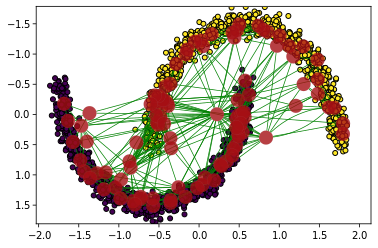

In [44]:
# Layer 1

fig, ax = plt.subplots()

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=y1, s=25, edgecolor='k', zorder=-2)
gt.graph_draw(mlgng[0].g, pos=mlgng[0].g.vp.pos, output_size=(200, 200), edge_color="green", vertex_size=0.2, vertex_pen_width=0.001, edge_pen_width=0.01, mplfig=ax)

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f60fc3516a0, at 0x7f60fc36a460>

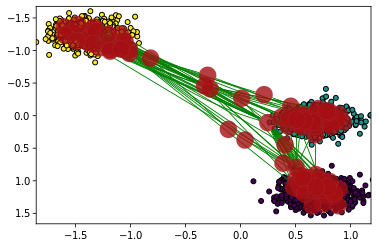

In [45]:
# Layer 2
fig, ax = plt.subplots()

plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=y2, s=25, edgecolor='k', zorder=-2)
gt.graph_draw(mlgng.layers[1].g, pos=mlgng.layers[1].g.vp.pos, output_size=(200, 200), edge_color="green", vertex_size=0.2, vertex_pen_width=0.001, edge_pen_width=0.01, mplfig=ax)

In [46]:
mlgng.policy(X1[0])

array([0.00572972, 0.47700367])

In [47]:
mlgng = MultiLayerGrowingNeuralGas(m=2, ndim=col)

mlgng.layers[0].fit(X1[0])
x = mlgng.policy(X1[2])
mlgng.layers[0].fit(X1[1])
y = mlgng.policy(X1[2])
print(x)
print(y)

[inf inf]
[0.33366143        inf]
